# Comparison of Means

### Answer with the type of test you would use (assume normal distribution):


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from pydataset import data


### Is there a difference in grades of students on the second floor compared to grades of all students?


One Sample T-Test: scipy.stats.ttest_1samp, 2 tail

### Are adults who drink milk taller than adults who dont drink milk?


Independent T-Test AKA Two sample T-Test: scipy.stats.ttest_ind, 1 tail

### Is the the price of gas higher in texas or in new mexico?


Independent T-Test AKA Two sample T-Test: scipy.stats.ttest_ind, 1 tail

### Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?
 

ANOVA: scipy.stats.f_oneway

### Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.


#### H0: Average time to sell at office1 == average time to sell at office2

#### Ha: Average time to sell at office1 != average time to sell at office2

In [2]:
office1 = stats.norm(90,15).rvs(40)
office2 = stats.norm(100,20).rvs(50)

In [3]:
print(office1.var())
print(office2.var())

293.1111245412988
384.2849282881499


In [4]:
a = 0.05

In [5]:
tstat, pval = stats.ttest_ind(office1, office2)

In [6]:
tstat, pval

(-3.4922235120790943, 0.0007515151933187564)

In [7]:
if pval < 0.05:
    print('We can reject Null Hypothesis')
else:
    print('We fail to reject the Null Hypothesis')

We can reject Null Hypothesis


Because the pval is less than alpha, we can reject the null hypothesis.

### Load the mpg dataset and use it to answer the following questions:


In [8]:
df = data('mpg')


In [9]:
df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


### Is there a difference in fuel-efficiency in cars from 2008 vs 1999?


In [10]:
df['avg_miles'] = (df.cty +df.hwy)/2

In [11]:
df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_miles
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,22.0


In [12]:
df.groupby('year').avg_miles.mean()

year
1999    20.222222
2008    20.076923
Name: avg_miles, dtype: float64

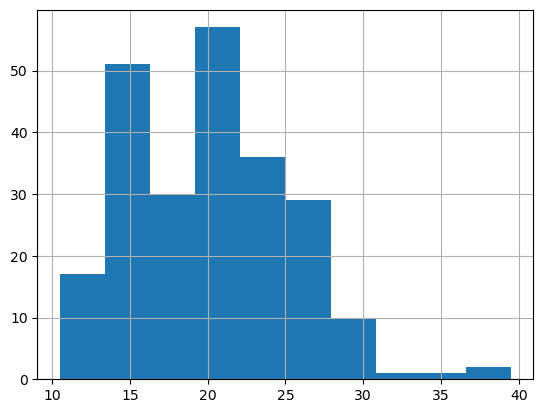

In [13]:
df.avg_miles.hist()
plt.show()

In [14]:
old_sample = df[df.year==1999].avg_miles

<Axes: >

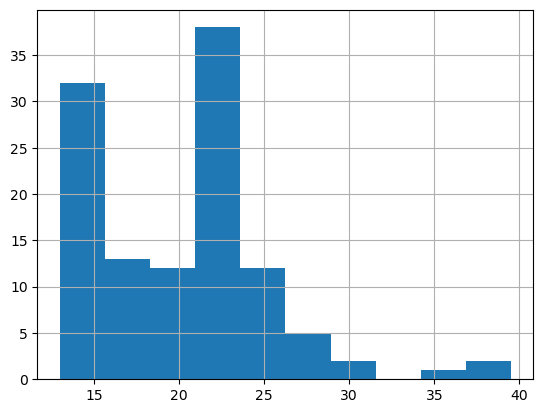

In [15]:
old_sample.hist()

In [16]:
new_sample = df[df.year==2008].avg_miles

<Axes: >

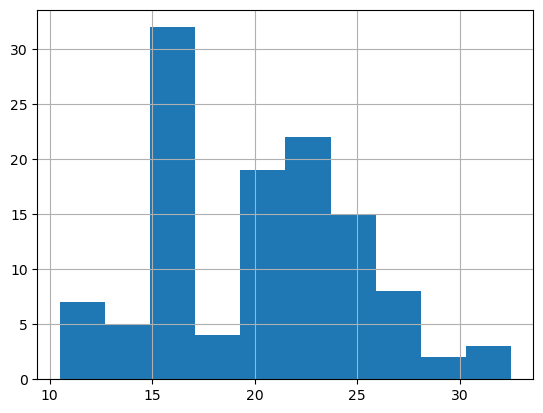

In [17]:
new_sample.hist()

H0: Mean of mile efficiency for cars made in the year 1999 has no difference versus Mean of mile efficiency for cars made in the year 2008

Ha: Mean of mile efficiency for cars made in the year 1999 has differences versus Mean of mile efficiency for cars made in the year 2008

In [18]:
alpha = 0.5

In [19]:
stat, pval = stats.levene(old_sample, new_sample)

In [20]:
pval

0.855517569468803

we cannot reject the idea that there are equal variances in these two groups

In [21]:
t, p = stats.ttest_ind(old_sample, new_sample)
t, p


(0.21960177245940962, 0.8263744040323578)

In [22]:
 p < alpha

False

Failed to Reject Null hypothesis

### Are compact cars more fuel-efficient than the average car?

In [23]:
theoretical_mean = df.avg_miles.mean()
print(theoretical_mean)

compact_mean = df[df['class'] == 'compact'].avg_miles.mean()
print(compact_mean)

20.14957264957265
24.21276595744681


H0: Mean of fuel effeciency of compact cars =< Mean of all mileage

Ha: Mean of fuel effeciency of compact cars > Mean of all mileage

In [24]:
alpha = 0.05

In [25]:
df['class'].value_counts()

suv           62
compact       47
midsize       41
subcompact    35
pickup        33
minivan       11
2seater        5
Name: class, dtype: int64

Sample is greater than 30, large enough to assume normal distribution

In [26]:
theoretical_mean = df.avg_miles.mean()
sample = df[df['class'] == 'compact'].avg_miles


In [27]:
tstat, pval = stats.ttest_1samp(sample, theoretical_mean)


In [28]:
tstat, pval


(7.896888573132533, 4.1985637943171486e-10)

In [29]:
if ((pval / 2) < alpha) and (tstat > 0):
    print("we can reject the null hypothesis")
else:
    print('We fail to reject the null hypothesis')


we can reject the null hypothesis


Ha: Mean of fuel effeciency of compact cars > Mean of all mileage

### Do manual cars get better gas mileage than automatic cars?

In [30]:
df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_miles
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,22.0


<Axes: >

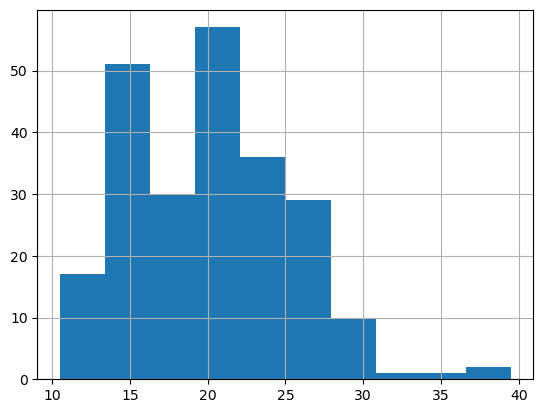

In [31]:
df.avg_miles.hist()

H0: Mean of manual fuel effeciency =< Mean of automatics fuel effeciency

Ha: Mean of manual fuel effeciency > Mean of automatics fuel effeciency

<Axes: >

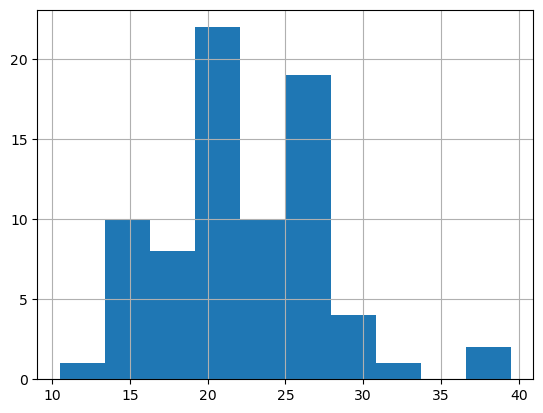

In [32]:
manual_sample = df[df.trans.str.contains('manual')].avg_miles
manual_sample.hist()


<Axes: >

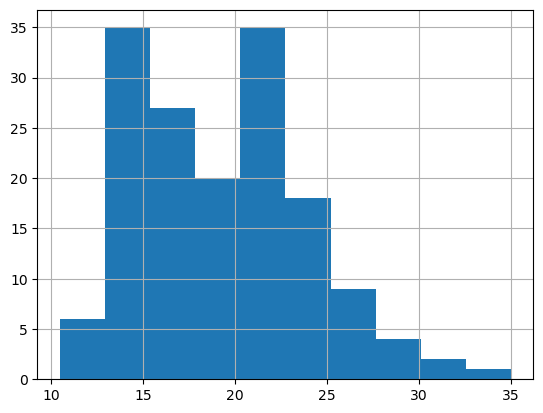

In [33]:
auto_sample = df[df.trans.str.contains('auto')].avg_miles
auto_sample.hist()

In [34]:
mean_a = manual_sample.mean()
mean_b = auto_sample.mean()

In [35]:
mean_a, mean_b

(22.227272727272727, 19.130573248407643)

In [36]:
alpha = 0.05

In [37]:
stat, pval = stats.levene(manual_sample, auto_sample)

In [38]:
pval

0.6545276355131857

In [39]:
t, p = stats.ttest_ind(manual_sample, auto_sample)
t, p

(4.593437735750014, 7.154374401145685e-06)

In [40]:
if (t > 0) and ((p / 2) < alpha):
    print('We can reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')

We can reject the null hypothesis


Ha: Mean of manual fuel effeciency > Mean of automatics fuel effeciency

# Correlations

### Answer with the type of stats test you would use (assume normal distribution):


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from scipy import stats
from pydataset import data
from env import user, password, host
import warnings
warnings.filterwarnings("ignore")



### Is there a relationship between the length of your arm and the length of your foot?
### 

pearsonsr

### Do guys and gals quit their jobs at the same rate?
### 

\$χ^2$

### Does the length of time of the lecture correlate with a students grade?
### 

pearsonsr

### Use the telco_churn data.
### 

### Does tenure correlate with monthly charges?
### 

In [42]:
def get_db_url(database):
    return f'mysql+pymysql://{user}:{password}@{host}/{database}'
    
url = f'mysql+pymysql://{user}:{password}@{host}/telco_churn'

In [43]:
churn = pd.read_sql('SHOW TABLES', url)
churn

,Tables_in_telco_churn
0,contract_types
1,customer_churn
2,customer_contracts
3,customer_details
4,customer_payments
5,customer_signups
6,customer_subscriptions
7,customers
8,internet_service_types
9,payment_types


In [44]:
df = pd.read_sql('SELECT * FROM customers', url)

In [45]:
df

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.60,593.3,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.90,542.4,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.90,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.00,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.90,267.4,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,0,No,No,13,Yes,No,1,Yes,...,No,Yes,No,No,2,No,2,55.15,742.9,No
7039,9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,2,No,...,No,No,No,Yes,1,Yes,1,85.10,1873.7,Yes
7040,9992-UJOEL,Male,0,No,No,2,Yes,No,1,No,...,No,No,No,No,1,Yes,2,50.30,92.75,No
7041,9993-LHIEB,Male,0,Yes,Yes,67,Yes,No,1,Yes,...,Yes,Yes,No,Yes,3,No,2,67.85,4627.65,No


<Axes: >

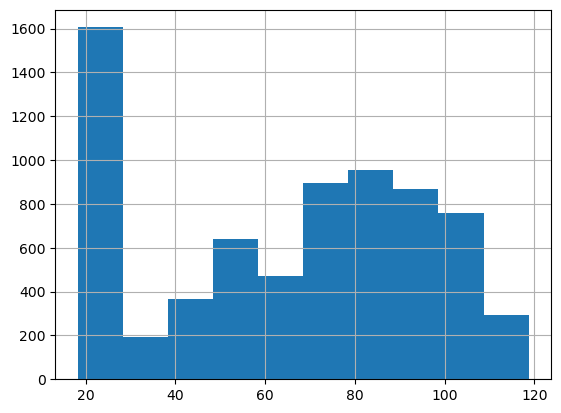

In [46]:
df.monthly_charges.hist()

$H_0$: There is not a relationship between Tenure and Monthly Charges

$H_a$:  There is a relationship between Tenure and Monthly Charges

In [47]:
alpha = 0.05

In [48]:
r, p = stats.pearsonr(df.tenure, df.monthly_charges)
r, p

(0.24789985628615246, 4.094044991483017e-99)

In [49]:
p < alpha

True

We can reject the Null Hypothesis

### Total charges?
### 

In [50]:
df1 = df[df.total_charges != " "]
df1

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.60,593.3,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.90,542.4,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.90,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.00,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.90,267.4,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,0,No,No,13,Yes,No,1,Yes,...,No,Yes,No,No,2,No,2,55.15,742.9,No
7039,9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,2,No,...,No,No,No,Yes,1,Yes,1,85.10,1873.7,Yes
7040,9992-UJOEL,Male,0,No,No,2,Yes,No,1,No,...,No,No,No,No,1,Yes,2,50.30,92.75,No
7041,9993-LHIEB,Male,0,Yes,Yes,67,Yes,No,1,Yes,...,Yes,Yes,No,Yes,3,No,2,67.85,4627.65,No


In [51]:
df1.total_charges

0         593.3
1         542.4
2        280.85
3       1237.85
4         267.4
         ...   
7038      742.9
7039     1873.7
7040      92.75
7041    4627.65
7042     3707.6
Name: total_charges, Length: 7032, dtype: object

In [52]:
df1['total_charges'] = df1.total_charges.astype(float)


$H_0$: There is not a relationship between Tenure and Total Charges

$H_a$: There is a relationship between Tenure and Total Charges

In [53]:
apha = 0.05

In [54]:
r, p = stats.pearsonr(df1.tenure, df1.total_charges)
r, p

(0.8258804609332071, 0.0)

In [55]:
p < alpha

True

We can reject the Null Hypothesis

### What happens if you control for phone and internet service?
### 

In [56]:
df.internet_service_type_id.value_counts()

2    3096
1    2421
3    1526
Name: internet_service_type_id, dtype: int64

In [57]:
df.phone_service.value_counts()

Yes    6361
No      682
Name: phone_service, dtype: int64

In [58]:
it1 = df1[df['internet_service_type_id'] == 1]
it2 = df1[df['internet_service_type_id'] == 2]
it3 = df1[df1['internet_service_type_id'] == 3]
ps1 = df1[df1['phone_service'] == 'Yes']
ps2 = df1[df1['phone_service'] == 'No']

$H_0$: There is not a relationship between Tenure and Total Charges

$H_a$: There is a relationship between Tenure and Total Charges

In [59]:
a = 0.05

In [60]:
r, p = stats.pearsonr(it1.tenure, it1.total_charges)
r, p

(0.9411848215629808, 0.0)

In [61]:
p < a

True

In [62]:
r, p = stats.pearsonr(it2.tenure, it2.total_charges)
r, p

(0.9853093528070621, 0.0)

In [63]:
p < a

True

In [64]:
r, p = stats.pearsonr(it3.tenure, it3.total_charges)
r, p

(0.9814648859044293, 0.0)

In [65]:
p < a

True

In [66]:
r, p = stats.pearsonr(ps1.tenure, ps1.total_charges)
r, p

(0.8298393210699468, 0.0)

In [67]:
p < a

True

In [68]:
r, p = stats.pearsonr(ps2.tenure, ps2.total_charges)
r, p

(0.9534228506954511, 0.0)

In [69]:
p < a

True

We can reject the NUll Hypothesis

### Use the employees database.
### 

In [70]:
def get_db_url(database):
    return f'mysql+pymysql://{user}:{password}@{host}/{database}'
    
url = f'mysql+pymysql://{user}:{password}@{host}/employees'

In [71]:
df = pd.read_sql('SELECT * FROM salaries', url)

In [72]:
df

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10001,62102,1987-06-26,1988-06-25
2,10001,66074,1988-06-25,1989-06-25
3,10001,66596,1989-06-25,1990-06-25
4,10001,66961,1990-06-25,1991-06-25
...,...,...,...,...
2844042,499999,63707,1997-11-30,1998-11-30
2844043,499999,67043,1998-11-30,1999-11-30
2844044,499999,70745,1999-11-30,2000-11-29
2844045,499999,74327,2000-11-29,2001-11-29


In [73]:
ef = pd.read_sql('SELECT * FROM employees', url)


In [74]:
ef

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12
...,...,...,...,...,...,...
300019,499995,1958-09-24,Dekang,Lichtner,F,1993-01-12
300020,499996,1953-03-07,Zito,Baaz,M,1990-09-27
300021,499997,1961-08-03,Berhard,Lenart,M,1986-04-21
300022,499998,1956-09-05,Patricia,Breugel,M,1993-10-13


In [75]:
merger = df.merge( ef, on= 'emp_no')


In [76]:
merger

,emp_no,salary,from_date,to_date,birth_date,first_name,last_name,gender,hire_date
0,10001,60117,1986-06-26,1987-06-26,1953-09-02,Georgi,Facello,M,1986-06-26
1,10001,62102,1987-06-26,1988-06-25,1953-09-02,Georgi,Facello,M,1986-06-26
2,10001,66074,1988-06-25,1989-06-25,1953-09-02,Georgi,Facello,M,1986-06-26
3,10001,66596,1989-06-25,1990-06-25,1953-09-02,Georgi,Facello,M,1986-06-26
4,10001,66961,1990-06-25,1991-06-25,1953-09-02,Georgi,Facello,M,1986-06-26
...,...,...,...,...,...,...,...,...,...
2844042,499999,63707,1997-11-30,1998-11-30,1958-05-01,Sachin,Tsukuda,M,1997-11-30
2844043,499999,67043,1998-11-30,1999-11-30,1958-05-01,Sachin,Tsukuda,M,1997-11-30
2844044,499999,70745,1999-11-30,2000-11-29,1958-05-01,Sachin,Tsukuda,M,1997-11-30
2844045,499999,74327,2000-11-29,2001-11-29,1958-05-01,Sachin,Tsukuda,M,1997-11-30


### Is there a relationship between how long an employee has been with the company and their salary?
### 

In [77]:
merger['to_date'] = merger['to_date'].astype(str)

In [78]:
merger = merger[~merger['to_date'].str.contains('9999')]


In [79]:
merger

,emp_no,salary,from_date,to_date,birth_date,first_name,last_name,gender,hire_date
0,10001,60117,1986-06-26,1987-06-26,1953-09-02,Georgi,Facello,M,1986-06-26
1,10001,62102,1987-06-26,1988-06-25,1953-09-02,Georgi,Facello,M,1986-06-26
2,10001,66074,1988-06-25,1989-06-25,1953-09-02,Georgi,Facello,M,1986-06-26
3,10001,66596,1989-06-25,1990-06-25,1953-09-02,Georgi,Facello,M,1986-06-26
4,10001,66961,1990-06-25,1991-06-25,1953-09-02,Georgi,Facello,M,1986-06-26
...,...,...,...,...,...,...,...,...,...
2844040,499998,51182,2000-12-25,2001-12-25,1956-09-05,Patricia,Breugel,M,1993-10-13
2844042,499999,63707,1997-11-30,1998-11-30,1958-05-01,Sachin,Tsukuda,M,1997-11-30
2844043,499999,67043,1998-11-30,1999-11-30,1958-05-01,Sachin,Tsukuda,M,1997-11-30
2844044,499999,70745,1999-11-30,2000-11-29,1958-05-01,Sachin,Tsukuda,M,1997-11-30


### Is there a relationship between how long an employee has been with the company and the number of titles they have had?
### 

In [80]:
from datetime import datetime

current_datetime = datetime.now()

$H_0$: There is not a relationship between tenure and salary

$H_a$: There is a relationship between tenure and salary

In [81]:
a = 0.05

In [82]:
merger.hire_date = pd.to_datetime(merger.hire_date)

In [83]:
merger['tenure'] =  datetime.now() - merger['hire_date']


In [84]:
merger.hire_date.dtype

dtype('<M8[ns]')

In [85]:
merger['tenure']= merger.tenure.dt.days


In [86]:
merger

,emp_no,salary,from_date,to_date,birth_date,first_name,last_name,gender,hire_date,tenure
0,10001,60117,1986-06-26,1987-06-26,1953-09-02,Georgi,Facello,M,1986-06-26,13490
1,10001,62102,1987-06-26,1988-06-25,1953-09-02,Georgi,Facello,M,1986-06-26,13490
2,10001,66074,1988-06-25,1989-06-25,1953-09-02,Georgi,Facello,M,1986-06-26,13490
3,10001,66596,1989-06-25,1990-06-25,1953-09-02,Georgi,Facello,M,1986-06-26,13490
4,10001,66961,1990-06-25,1991-06-25,1953-09-02,Georgi,Facello,M,1986-06-26,13490
...,...,...,...,...,...,...,...,...,...,...
2844040,499998,51182,2000-12-25,2001-12-25,1956-09-05,Patricia,Breugel,M,1993-10-13,10824
2844042,499999,63707,1997-11-30,1998-11-30,1958-05-01,Sachin,Tsukuda,M,1997-11-30,9315
2844043,499999,67043,1998-11-30,1999-11-30,1958-05-01,Sachin,Tsukuda,M,1997-11-30,9315
2844044,499999,70745,1999-11-30,2000-11-29,1958-05-01,Sachin,Tsukuda,M,1997-11-30,9315


In [96]:
merger.head(20)

,emp_no,salary,from_date,to_date,birth_date,first_name,last_name,gender,hire_date,tenure
0,10001,60117,1986-06-26,1987-06-26,1953-09-02,Georgi,Facello,M,1986-06-26,13490
1,10001,62102,1987-06-26,1988-06-25,1953-09-02,Georgi,Facello,M,1986-06-26,13490
2,10001,66074,1988-06-25,1989-06-25,1953-09-02,Georgi,Facello,M,1986-06-26,13490
3,10001,66596,1989-06-25,1990-06-25,1953-09-02,Georgi,Facello,M,1986-06-26,13490
4,10001,66961,1990-06-25,1991-06-25,1953-09-02,Georgi,Facello,M,1986-06-26,13490
5,10001,71046,1991-06-25,1992-06-24,1953-09-02,Georgi,Facello,M,1986-06-26,13490
6,10001,74333,1992-06-24,1993-06-24,1953-09-02,Georgi,Facello,M,1986-06-26,13490
7,10001,75286,1993-06-24,1994-06-24,1953-09-02,Georgi,Facello,M,1986-06-26,13490
8,10001,75994,1994-06-24,1995-06-24,1953-09-02,Georgi,Facello,M,1986-06-26,13490
9,10001,76884,1995-06-24,1996-06-23,1953-09-02,Georgi,Facello,M,1986-06-26,13490


In [87]:
alpha = 0.5

In [88]:
r, p = stats.pearsonr(merger.tenure, merger.salary)
r, p

(0.15820966340954157, 0.0)

In [89]:
p < alpha

True

We can reject the Null Hypothesis

### Use the sleepstudy data.
### 

In [90]:
df = data('sleepstudy')

In [91]:
df

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308
...,...,...,...
176,329.6076,5,372
177,334.4818,6,372
178,343.2199,7,372
179,369.1417,8,372


### Is there a relationship between days and reaction time?

<Axes: >

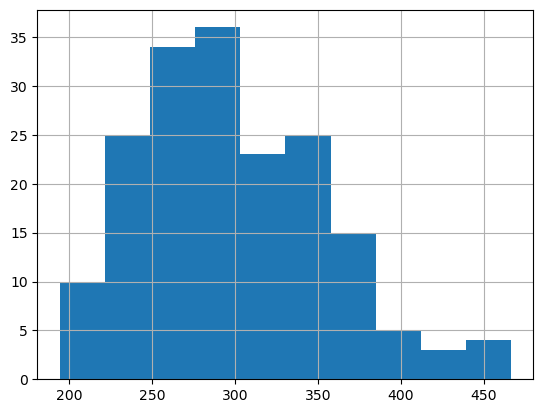

In [92]:
df.Reaction.hist()

$H_0$: There is not a relationship between Days and Reaction

$H_a$: There is a relationship between Days and Reaction

In [93]:
a = 0.05

In [94]:
r, p = stats.pearsonr(df.Days, df.Reaction)
r, p

(0.5352302262650255, 9.89409632221439e-15)

In [95]:
p < a

True

We can reject the Null Hypothesis

# Comparison of Groups

### Answer with the type of stats test you would use (assume normal distribution):

### Do students get better test grades if they have a rubber duck on their desk?

T-TEST, 1 tail

### Does smoking affect when or not someone has lung cancer?

$Chi^2$

### Is gender independent of a person’s blood type?

$Chi^2$

### A farming company wants to know if a new fertilizer has improved crop yield or not


indendent t-test

### Does the length of time of the lecture correlate with a students grade?

pearsonR

### Do people with dogs live in apartments more than people with cats?


Independent T-Test

## Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

In [108]:
import pandas as pd
from scipy import stats
from pydataset import data
import itertools
from env import get_db_url

```
                            Codeup Student	Not Codeup Student
Uses a Macbook	               49	                  20
Doesn't Use A Macbook	        1	                  30

```

### Choose another 2 categorical variables from the mpg dataset and perform a chi2 contingency table test with them. Be sure to state your null and alternative hypotheses.


$N_0$:macbook use and being a Coduep student are indepent of eachother

$N_a$:there is a relationship between Mac use and Codeup


In [102]:
row = ["Uses Macbook", "Doesn't Macbook"]
columns = ["Codeup Student", "Not Codeup Student"]

observed = pd.DataFrame([[49, 20], [1, 30]], index=row, columns=columns)
observed

,Codeup Student,Not Codeup Student
Uses Macbook,49,20
Doesn't Macbook,1,30


In [103]:
a = 0.05

In [104]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
p


1.4116760526193828e-09

In [107]:
if p < a:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null")

Reject the null hypothesis


## Use the data from the employees database to answer these questions:


### Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)

In [109]:
sql = """
SELECT gender, dept_name
FROM employees
JOIN dept_emp using(emp_no)
JOIN departments using(dept_no)
WHERE to_date > curdate()
AND dept_name IN ('Sales', 'Marketing')
"""

url = get_db_url("employees")

df = pd.read_sql(sql, url)
df.head()


,gender,dept_name
0,F,Marketing
1,M,Marketing
2,F,Marketing
3,F,Marketing
4,F,Marketing


In [110]:
df.dept_name.value_counts()


Sales        37701
Marketing    14842
Name: dept_name, dtype: int64

In [111]:
observed = pd.crosstab(df.gender, df.dept_name)
observed


dept_name,Marketing,Sales
gender,,
F,5864,14999
M,8978,22702


In [112]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

### Is an employee's gender independent of whether or not they are or have been a manager?

$H_a$: employee gender is independent of being a manager

$H_0$: employee gender is not independent of being a manager

In [115]:
sql = """
SELECT gender, title, emp_no
FROM employees
JOIN titles using(emp_no)
"""

In [117]:
df = pd.read_sql(sql, url)
df.head()

,gender,title,emp_no
0,M,Senior Engineer,10001
1,F,Staff,10002
2,M,Senior Engineer,10003
3,M,Engineer,10004
4,M,Senior Engineer,10004


In [120]:
df["manager"] = df.title == "Manager"
observed = pd.crosstab(df.gender, df.manager)
observed


manager,False,True
gender,,
F,177211,13
M,266073,11


In [121]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
p


0.22600394509880642

In [122]:
if p < a:
    print("Reject the null")
else: 
    print("Fail to reject the null")


Fail to reject the null
